In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.metrics import r2_score, mean_absolute_error
sns.set()
plt.style.use('seaborn-whitegrid')

In [15]:
data = pd.read_csv("/Users/nirupam/Desktop/mlproject/INR=X.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.615002  45.709999  45.709999     0.0
1  2003-12-02  45.709000  45.719002  45.560001  45.629002  45.629002     0.0
2  2003-12-03  45.632000  45.655998  45.474998  45.549999  45.549999     0.0
3  2003-12-04  45.548000  45.612999  45.519001  45.548000  45.548000     0.0
4  2003-12-05  45.549999  45.566002  45.449001  45.449001  45.449001     0.0


In [16]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4821,False,False,False,False,False,False,False
4822,False,False,False,False,False,False,False
4823,False,False,False,False,False,False,False
4824,False,False,False,False,False,False,False


In [17]:
data.isnull().sum()

Date          0
Open         32
High         32
Low          32
Close        32
Adj Close    32
Volume       32
dtype: int64

In [18]:
data.dropna(axis=0,inplace=True)

In [19]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

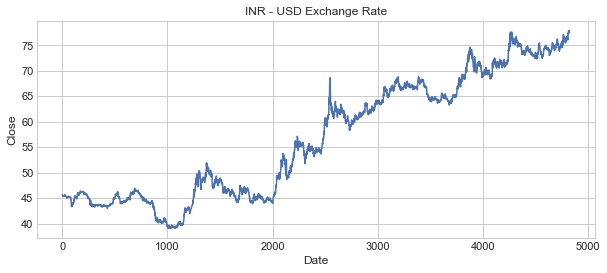

In [20]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.999834  0.999794  0.999898   0.999898     NaN
High       0.999834  1.000000  0.999718  0.999828   0.999828     NaN
Low        0.999794  0.999718  1.000000  0.999786   0.999786     NaN
Close      0.999898  0.999828  0.999786  1.000000   1.000000     NaN
Adj Close  0.999898  0.999828  0.999786  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


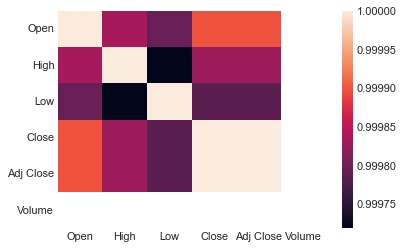

In [21]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [22]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [73]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.6, random_state=42)

In [74]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [75]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       44.020000
1       40.700001
2       46.067001
3       46.439999
4       45.160000


In [76]:
r2 = r2_score(ypred,ytest)
mean = mean_absolute_error(ypred,ytest)
print("r2_score is: ")
print(r2)
print("mean absolute error is: ")
print(mean)

r2_score is: 
0.9997363520493273
mean absolute error is: 
0.10894649356969062


# Testing it for another data set EUR-INR

In [29]:
data1 = pd.read_csv("/Users/nirupam/Desktop/mlproject/EURINR=X.csv")
print(data1.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  55.004002  55.014999  54.466999  54.700001  54.700001     0.0
1  2003-12-02  54.662998  55.243999  54.359001  55.139000  55.139000     0.0
2  2003-12-03  55.162998  55.305000  54.881001  55.181000  55.181000     0.0
3  2003-12-04  55.181999  55.325001  54.772999  55.000999  55.000999     0.0
4  2003-12-05  55.020000  55.370998  54.880001  55.370998  55.370998     0.0


In [32]:
data1.isnull().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

In [35]:
data1.dropna(axis=0,inplace=True)

In [36]:
data1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

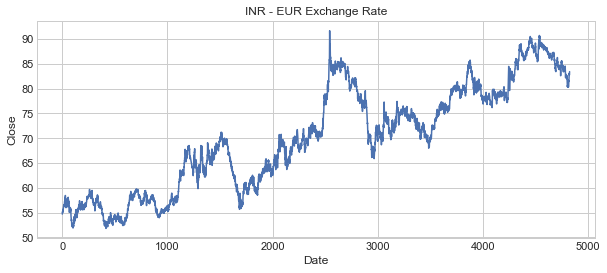

In [37]:
plt.figure(figsize=(10, 4))
plt.title("INR - EUR Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data1["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.996424  0.999467  0.996462   0.996462     NaN
High       0.996424  1.000000  0.996325  0.999482   0.999482     NaN
Low        0.999467  0.996325  1.000000  0.996446   0.996446     NaN
Close      0.996462  0.999482  0.996446  1.000000   1.000000     NaN
Adj Close  0.996462  0.999482  0.996446  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


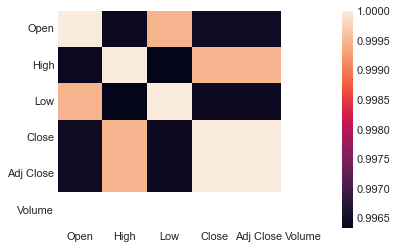

In [38]:
print(data1.corr())
sns.heatmap(data1.corr())
plt.show()

In [39]:
x1 = data1[["Open", "High", "Low"]]
y1 = data1["Close"]
x1 = x1.to_numpy()
y1 = y1.to_numpy()
y1 = y1.reshape(-1, 1)

In [64]:
ypred1 = model.predict(x1)

In [65]:
r2_1 = r2_score(ypred1,y1)
mean_1 = mean_absolute_error(ypred1,y1)
print("r2_score is: ")
print(r2_1)
print("mean absolute error is: ")
print(mean_1)

r2_score is: 
0.0
mean absolute error is: 
69.40244010425354


# Testing it for another data set JPY-INR

In [46]:
data2 = pd.read_csv("/Users/nirupam/Desktop/mlproject/JPYINR=X.csv")
print(data2.head())

         Date     Open     High      Low    Close  Adj Close  Volume
0  2003-12-01  0.41586  0.41902  0.41561  0.41892    0.41892     0.0
1  2003-12-02  0.41872  0.42036  0.41500  0.41948    0.41948     0.0
2  2003-12-03  0.41962  0.42152  0.41863  0.42044    0.42044     0.0
3  2003-12-04  0.42035  0.42190  0.41948  0.42070    0.42070     0.0
4  2003-12-05  0.42082  0.42350  0.41947  0.42350    0.42350     0.0


In [48]:
data2.isnull().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

In [49]:
data2.dropna(axis=0,inplace=True)

In [50]:
data2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

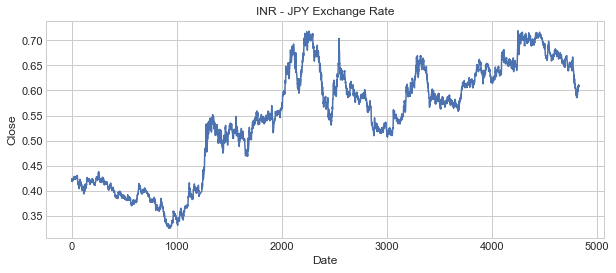

In [51]:
plt.figure(figsize=(10, 4))
plt.title("INR - JPY Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data2["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.997137  0.999640  0.997251   0.997251     NaN
High       0.997137  1.000000  0.997046  0.999502   0.999502     NaN
Low        0.999640  0.997046  1.000000  0.997206   0.997206     NaN
Close      0.997251  0.999502  0.997206  1.000000   1.000000     NaN
Adj Close  0.997251  0.999502  0.997206  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


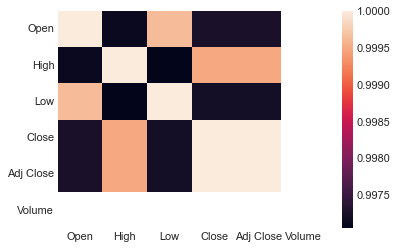

In [52]:
print(data2.corr())
sns.heatmap(data2.corr())
plt.show()

In [53]:
x2 = data2[["Open", "High", "Low"]]
y2 = data2["Close"]
x2 = x2.to_numpy()
y2 = y2.to_numpy()
y2 = y2.reshape(-1, 1)

In [54]:
x2

array([[0.41586 , 0.41902 , 0.41561 ],
       [0.41872 , 0.42036 , 0.415   ],
       [0.41962 , 0.42152 , 0.41863 ],
       ...,
       [0.608716, 0.612353, 0.606943],
       [0.610851, 0.612128, 0.609093],
       [0.61027 , 0.61121 , 0.60675 ]])

In [55]:
y2

array([[0.41892 ],
       [0.41948 ],
       [0.42044 ],
       ...,
       [0.608882],
       [0.610519],
       [0.60717 ]])

In [56]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

array([[0.38   , 0.38095, 0.37715],
       [0.33892, 0.34006, 0.33657],
       [0.50383, 0.50416, 0.49826],
       ...,
       [0.66824, 0.68132, 0.66824],
       [0.38488, 0.40195, 0.38488],
       [0.60513, 0.60578, 0.59968]])

In [61]:
model.fit(xtrain2, ytrain2)
ypred2 = model.predict(xtest2)

In [63]:
r2_2 = r2_score(ypred2,ytest2)
mean_2 = mean_absolute_error(ypred2,ytest2)
print("r2_score is: ")
print(r2_2)
print("mean absolute error is: ")
print(mean_2)

r2_score is: 
0.9988742274377534
mean absolute error is: 
0.001776753125000001


# Testing it for another data set GBP-INR